In [505]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from matplotlib.pyplot import figure
from statsmodels.formula.api import ols
from scipy import stats
import statsmodels.api as sm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import MeanSquaredError
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from scipy.special import expit
%matplotlib inline

In [506]:
df = pd.read_csv("shelter_cleaned.csv") #Reading Dataset into notebook
df

,Unnamed: 0,Name,Named by Shelter,Type,Breed,Color,Sex,Protected,Size,Date Of Birth,...,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count,Age,Before Covid
0,0,REMY,False,DOG,BEAGLE,BLACK/WHITE,Female,False,MED,2014-04-11,...,OVER THE COUNTER_WEB,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95407.0,"95407(38.403734, -122.736775)",1,8.0,True
1,1,RONDE,True,DOG,CHIHUAHUA SH,TAN,Male,True,SMALL,2020-07-24,...,SCAS WEB,HEALTHY,HEALTHY,SANTA ROSA,*PETALUMA,94954.0,"94954(38.245316, -122.59871)",1,1.0,True
2,2,SNOOP,True,CAT,DOMESTIC SH,GRAY,Male,True,SMALL,2019-08-04,...,SCAS WEB,HEALTHY,HEALTHY,SANTA ROSA,SANTA ROSA,95405.0,"95405(38.439152, -122.672541)",1,2.0,True
3,3,FIFI,False,CAT,SIAMESE,SEAL PT,Female,True,KITTN,2020-10-27,...,SCAS WEB,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95407.0,"95407(38.403734, -122.736775)",1,1.0,True
4,4,MERLIN,True,CAT,DOMESTIC SH,BRN TABBY,Male,True,SMALL,2018-01-16,...,SCAS WEB,UNKNOWN,PENDING,SANTA ROSA,COUNTY,94952.0,"94952(38.236012, -122.730241)",1,4.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20171,21942,NaN,False,CAT,DOMESTIC SH,GRAY/WHITE,Female,False,SMALL,NaN,...,ILL SEVERE,UNKNOWN,UNTREATABLE,SANTA ROSA,NaN,NaN,NaN,1,3.0,False
20172,21943,NaN,False,CAT,DOMESTIC SH,GRAY,Unknown,False,KITTN,NaN,...,FORGOTTEN,UNKNOWN,HEALTHY,COUNTY,SANTA ROSA,95403.0,"95403(38.486997, -122.749134)",1,5.0,False
20173,21944,NaN,False,DOG,CHIHUAHUA LH/MIX,BLACK/WHITE,Male,False,TOY,2017-02-03,...,RP SHELTER,HEALTHY,HEALTHY,COUNTY,*ROHNERT PARK,94928.0,"94928(38.346718, -122.695947)",1,5.0,False
20174,21945,ANDY,False,DOG,CHIHUAHUA LH/MIX,BROWN/WHITE,Male,True,TOY,2015-04-24,...,INTERNET,TREATABLE/REHAB,TREATABLE/REHAB,SANTA ROSA,OUT OF COUNTY,94109.0,"94109(37.792737, -122.420971)",1,7.0,False


In [507]:
df["Date Of Birth"] = pd.to_datetime(df["Date Of Birth"])
df["Intake Date"] = pd.to_datetime(df["Intake Date"])
df["Outcome Date"] = pd.to_datetime(df["Outcome Date"])
df["Intake Date"].quantile(.87715)
today = pd.to_datetime("now")
df["Age"] = ((today - df["Date Of Birth"]).dt.days  / 365)

In [508]:
df["Age"]

0        7.624658
1        1.334247
2        2.306849
3        1.073973
4        3.854795
           ...   
20171         NaN
20172         NaN
20173    4.805479
20174    6.589041
20175    6.534247
Name: Age, Length: 20176, dtype: float64

In [509]:
df['Intake Date'].min()

Timestamp('2013-08-17 00:00:00')

In [510]:
df['Intake Date'].max()

Timestamp('2021-10-18 00:00:00')

In [511]:
df['Outcome Type'].value_counts()

RETURN TO OWNER    7240
ADOPTION           6321
TRANSFER           3511
EUTHANIZE          2632
DISPOSAL            146
DIED                104
APPT                 39
RTOS                 31
ESCAPED/STOLEN       12
Name: Outcome Type, dtype: int64

In [512]:
df["Size"].replace({"SMALL": 12, "MED": 24, "LARGE": 59, "KITTN": 3, "TOY": 5, "PUPPY": 4, "X-LRG": 100}, inplace=True) #https://dogsized.com/what-are-the-different-sizes-of-dogs/
dfClean = df[["Age","Size","Days in Shelter","Outcome Type"]]
dfClean

,Age,Size,Days in Shelter,Outcome Type
0,7.624658,24.0,3,RETURN TO OWNER
1,1.334247,12.0,49,ADOPTION
2,2.306849,12.0,38,ADOPTION
3,1.073973,3.0,6,ADOPTION
4,3.854795,12.0,20,ADOPTION
...,...,...,...,...
20171,NaN,12.0,0,EUTHANIZE
20172,NaN,3.0,0,TRANSFER
20173,4.805479,5.0,13,TRANSFER
20174,6.589041,5.0,16,ADOPTION


In [513]:
dogs = pd.DataFrame(df[df['Type'].isin(['DOG'])]) #Creating Dataframe which only includes rows of dogs and not cats
cats = pd.DataFrame(df[df['Type'].isin(['CAT'])]) #Creating Dataframe which only includes rows of cats and not dogs

In [514]:
dogs.columns #current varibles considered in the DataFrame

Index(['Unnamed: 0', 'Name', 'Named by Shelter', 'Type', 'Breed', 'Color',
       'Sex', 'Protected', 'Size', 'Date Of Birth', 'Impound Number',
       'Kennel Number', 'Animal ID', 'Intake Date', 'Outcome Date',
       'Days in Shelter', 'Intake Type', 'Intake Subtype', 'Outcome Type',
       'Outcome Subtype', 'Intake Condition', 'Outcome Condition',
       'Intake Jurisdiction', 'Outcome Jurisdiction', 'Outcome Zip Code',
       'Location', 'Count', 'Age', 'Before Covid'],
      dtype='object')

In [515]:
dogs["Outcome Type"].isna().value_counts() #This means that some animals do not have an outcome yet (Could still be in shelter)

False    12255
True        92
Name: Outcome Type, dtype: int64

In [516]:
dogs.columns

Index(['Unnamed: 0', 'Name', 'Named by Shelter', 'Type', 'Breed', 'Color',
       'Sex', 'Protected', 'Size', 'Date Of Birth', 'Impound Number',
       'Kennel Number', 'Animal ID', 'Intake Date', 'Outcome Date',
       'Days in Shelter', 'Intake Type', 'Intake Subtype', 'Outcome Type',
       'Outcome Subtype', 'Intake Condition', 'Outcome Condition',
       'Intake Jurisdiction', 'Outcome Jurisdiction', 'Outcome Zip Code',
       'Location', 'Count', 'Age', 'Before Covid'],
      dtype='object')

In [517]:
dogs['Outcome Type'].value_counts() #We will only consider animals that have already had an outcome

RETURN TO OWNER    6172
ADOPTION           2999
TRANSFER           1685
EUTHANIZE          1307
RTOS                 26
DIED                 26
DISPOSAL             22
APPT                 13
ESCAPED/STOLEN        5
Name: Outcome Type, dtype: int64

In [518]:
dogsOut = pd.DataFrame(dogs[dogs['Outcome Type'].notna()]) #Creating Dataframe which only includes rows of dogs with an outcome
#catsOut = pd.DataFrame(cats[cats['Outcome Type'].notna()]) #Creating Dataframe which only includes rows of cats with an outcome

In [519]:
dogsOut

,Unnamed: 0,Name,Named by Shelter,Type,Breed,Color,Sex,Protected,Size,Date Of Birth,...,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count,Age,Before Covid
0,0,REMY,False,DOG,BEAGLE,BLACK/WHITE,Female,False,24.0,2014-04-11,...,OVER THE COUNTER_WEB,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95407.0,"95407(38.403734, -122.736775)",1,7.624658,True
1,1,RONDE,True,DOG,CHIHUAHUA SH,TAN,Male,True,12.0,2020-07-24,...,SCAS WEB,HEALTHY,HEALTHY,SANTA ROSA,*PETALUMA,94954.0,"94954(38.245316, -122.59871)",1,1.334247,True
7,7,RICKY,False,DOG,LABRADOR RETR/MIX,BLUE/WHITE,Male,True,24.0,2020-01-04,...,OVER THE COUNTER_ARREST,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95403.0,"95403(38.486997, -122.749134)",1,1.887671,True
8,8,CALISTA,False,DOG,LABRADOR RETR,YELLOW,Female,False,24.0,2020-04-14,...,FLD_MCHIP,UNKNOWN,HEALTHY,SANTA ROSA,COUNTY,95403.0,"95403(38.486997, -122.749134)",1,1.610959,True
9,9,COCO,False,DOG,GERM SHEPHERD/MIX,WHITE,Female,True,59.0,NaT,...,FLD_MCHIP,UNKNOWN,HEALTHY,SANTA ROSA,SANTA ROSA,95407.0,"95407(38.403734, -122.736775)",1,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20165,21936,BUZZ,False,DOG,PARSON RUSS TER/MIX,TAN/WHITE,Male,False,12.0,2012-11-07,...,OVER THE COUNTER_WEB,UNKNOWN,HEALTHY,COUNTY,COUNTY,95407.0,"95407(38.403734, -122.736775)",1,9.049315,False
20167,21938,SAL,False,DOG,MASTIFF,FAWN,Male,False,59.0,NaT,...,OVER THE COUNTER_WEB,HEALTHY,HEALTHY,COUNTY,OUT OF COUNTY,89146.0,"89146(36.142341, -115.225859)",1,NaN,False
20168,21939,MUTT MUTT,False,DOG,AM PIT BULL TER,WHITE/BLUE MERLE,Male,False,24.0,2014-12-29,...,OVER THE COUNTER_CALL,UNKNOWN,PENDING,COUNTY,SANTA ROSA,95407.0,"95407(38.403734, -122.736775)",1,6.906849,True
20173,21944,NaN,False,DOG,CHIHUAHUA LH/MIX,BLACK/WHITE,Male,False,5.0,2017-02-03,...,RP SHELTER,HEALTHY,HEALTHY,COUNTY,*ROHNERT PARK,94928.0,"94928(38.346718, -122.695947)",1,4.805479,False


In [520]:
#dogs.drop(['Date Of Birth', 'Impound Number',

#'Kennel Number', 'Animal ID', 'Intake Date', 'Outcome Date',], axis=1, inplace=False)

In [521]:
dogsOut['Intake Condition'].value_counts()

HEALTHY                 7148
UNKNOWN                 2858
TREATABLE/MANAGEABLE     803
UNTREATABLE              796
TREATABLE/REHAB          650
Name: Intake Condition, dtype: int64

In [522]:
#catsOut['Breed'].value_counts()

In [523]:
dogsOut['Breed'].value_counts()

PIT BULL                        1634
CHIHUAHUA SH                    1044
GERM SHEPHERD                    779
PIT BULL/MIX                     718
CHIHUAHUA SH/MIX                 495
                                ... 
BEAGLE/BOXER                       1
AUST SHEPHERD/POODLE TOY           1
COLLIE ROUGH/GERM SHEPHERD         1
GERM SHEPHERD/AMERICAN STAFF       1
GERM SHEPHERD/STAFFORDSHIRE        1
Name: Breed, Length: 800, dtype: int64

In [524]:
dogsOut["Intake Type"].value_counts()

STRAY              8896
OWNER SURRENDER    1262
CONFISCATE         1229
QUARANTINE          336
TRANSFER            259
ADOPTION RETURN     247
OS APPT              26
Name: Intake Type, dtype: int64

In [525]:
dogsOut['Color'].value_counts()

BLACK/WHITE          1302
BLACK/TAN             963
BLACK                 903
WHITE                 825
TAN                   787
                     ... 
TRICOLOR/GRAY           1
BLUE/BLUE               1
BL BRINDLE/TAN          1
GRAY/BR BRINDLE         1
TRICOLOR/RED TICK       1
Name: Color, Length: 196, dtype: int64

In [526]:
petReturned = pd.DataFrame(df[df['Intake Type'].isin(['ADOPTION RETURN'])])

In [527]:
petReturned['Type'].value_counts()

DOG    252
CAT    102
Name: Type, dtype: int64

In [528]:
dogsReturned = pd.DataFrame(petReturned[petReturned['Type'].isin(['DOG'])])
dogsReturned['Color'].value_counts()

BLACK/WHITE         28
BLACK/TAN           22
TAN                 18
TAN/WHITE           16
BLACK               15
WHITE               15
BROWN               15
BROWN/WHITE         11
BR BRINDLE/WHITE     9
TRICOLOR             9
BLACK/BROWN          9
TAN/BLACK            7
BROWN/BLACK          6
BLUE/WHITE           6
WHITE/BROWN          6
WHITE/BLACK          5
BLUE                 4
BR BRINDLE           4
FAWN                 4
WHITE/TAN            4
FAWN/WHITE           3
GOLD                 3
RED                  3
GRAY                 3
GRAY/WHITE           3
RED/WHITE            3
BLUE MERLE           2
BLACK/GRAY           2
CHOCOLATE            2
BROWN/TAN            2
CREAM                1
CHOCOLATE/TAN        1
BLUE/FAWN            1
BL BRINDLE/WHITE     1
BL BRINDLE           1
WHITE/GRAY           1
WHITE/RED            1
TRICOLOR/WHITE       1
BLACK/BLACK          1
RED/TAN              1
GRAY/TAN             1
BLUE/TAN             1
CHOCOLATE/WHITE      1
Name: Color

In [529]:
catsReturned = pd.DataFrame(petReturned[petReturned['Type'].isin(['CAT'])])
catsReturned['Color'].value_counts()

BLACK                17
BLACK/WHITE          15
BRN TABBY            11
GRAY/WHITE            8
GRAY TABBY            6
ORG TABBY             5
CALICO                5
WHITE/BLACK           4
GRAY                  4
BRN TABBY/WHITE       4
LYNX PT               3
WHITE/GRAY            2
GRAY TABBY/WHITE      2
BLK SMOKE             2
ORANGE                2
BLUE CREAM/TORTIE     1
ORG TABBY/WHITE       1
LILAC PT/WHITE        1
BUFF                  1
BLUE PT               1
SEAL PT               1
TORTIE                1
CALICO/BRN TABBY      1
BUFF/WHITE            1
WHITE                 1
WHITE/ORG TABBY       1
BRN TABBY/BLACK       1
Name: Color, dtype: int64

In [530]:
petNotReturned = pd.DataFrame(df[~df['Intake Type'].isin(['ADOPTION RETURN'])])
petNotReturned["Intake Type"].value_counts()

STRAY              14769
OWNER SURRENDER     2700
CONFISCATE          1424
QUARANTINE           432
TRANSFER             420
OS APPT               77
Name: Intake Type, dtype: int64

In [531]:
catNotReturned = pd.DataFrame(petNotReturned[petNotReturned['Type'].isin(['CAT'])])
catNotReturned["Intake Type"].value_counts()

STRAY              5802
OWNER SURRENDER    1434
CONFISCATE          187
TRANSFER            161
QUARANTINE           93
OS APPT              50
Name: Intake Type, dtype: int64

In [532]:
dogNotReturned = pd.DataFrame(petNotReturned[petNotReturned['Type'].isin(['DOG'])])
dogNotReturned["Intake Type"].value_counts()

STRAY              8967
OWNER SURRENDER    1266
CONFISCATE         1237
QUARANTINE          339
TRANSFER            259
OS APPT              27
Name: Intake Type, dtype: int64

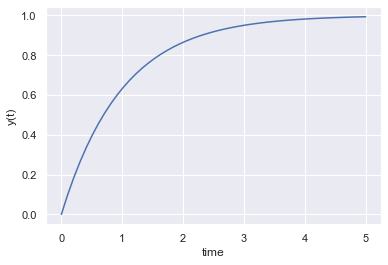

In [533]:
def model(y,t):
    dydt = -y + 1.0
    return dydt

# initial condition
y0 = 0

# time points
t = np.linspace(0,5)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

In [534]:
dfNumbers = df['Outcome Type'].eq('ADOPTION').mul(1)

In [535]:
dfNumbersAge = df['Age']
dfNumbersAge

dfNumbersDays = df['Days in Shelter']
dfNumbersDays

0         3
1        49
2        38
3         6
4        20
         ..
20171     0
20172     0
20173    13
20174    16
20175    49
Name: Days in Shelter, Length: 20176, dtype: int64

LinAlgError: SVD did not converge in Linear Least Squares

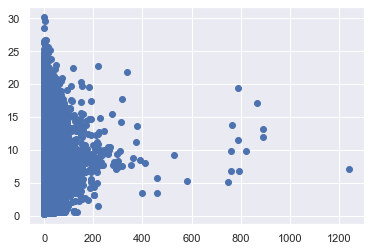

In [536]:
x = np.array(dfClean["Days in Shelter"])
y = np.array(dfClean["Age"])

plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

In [537]:
X = df[['Age', 'Days in Shelter']]
y = dfNumbers

regr = linear_model.LinearRegression()
regr.fit(X, y)
print(regr.coef_)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

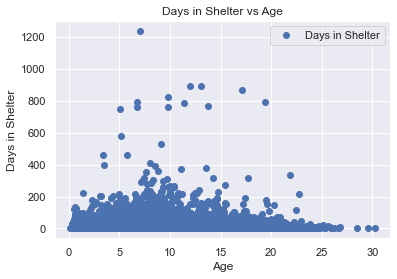

In [538]:
dfClean.plot(x='Age', y='Days in Shelter', style='o')  
plt.title('Days in Shelter vs Age')  
plt.xlabel('Age')  
plt.ylabel('Days in Shelter')  
plt.show()

C:\Users\Rudy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Days in Shelter', ylabel='Density'>

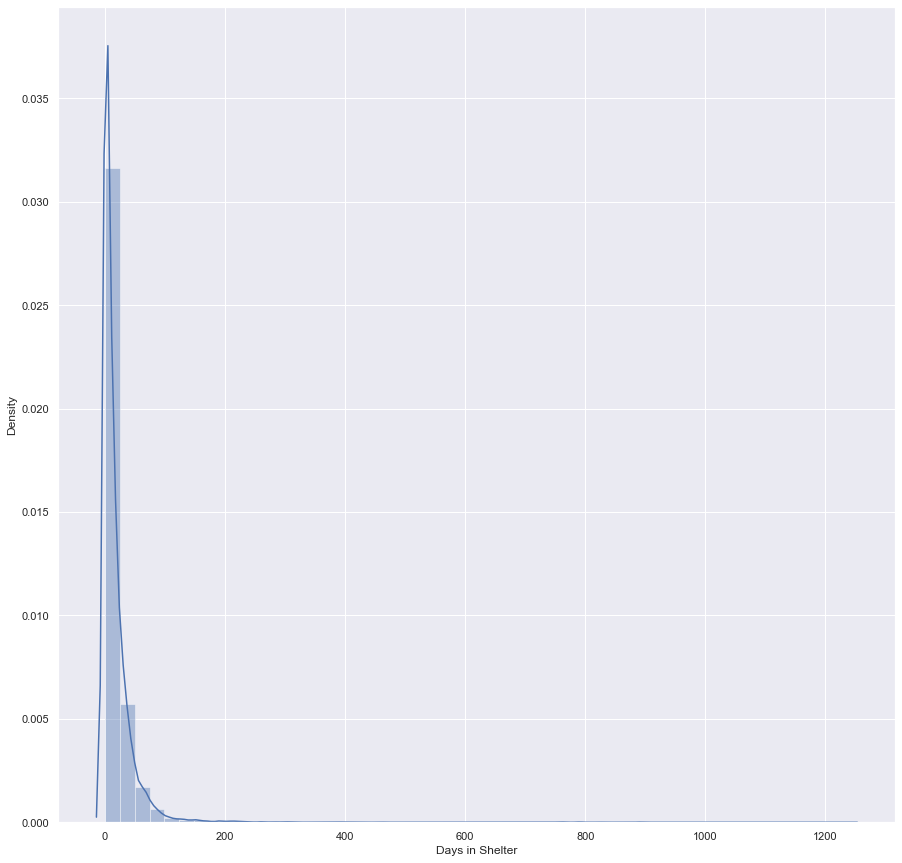

In [539]:
plt.figure(figsize=(15,15))
plt.tight_layout()
seabornInstance.distplot(dfClean['Days in Shelter'])

C:\Users\Rudy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

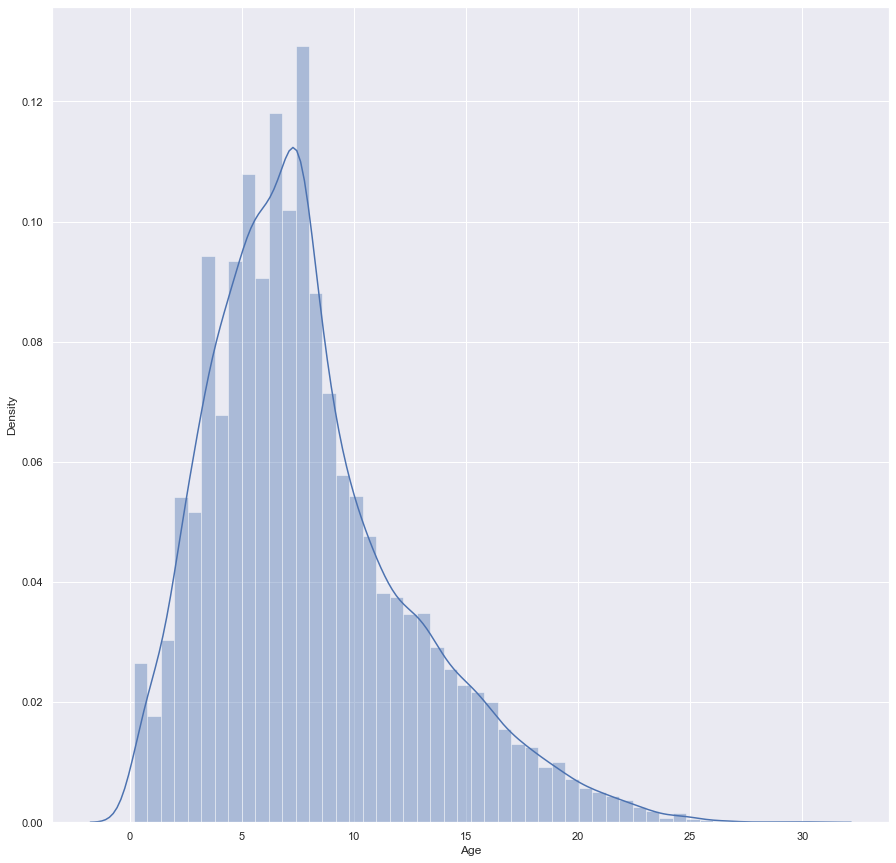

In [540]:
plt.figure(figsize=(15,15))
plt.tight_layout()
seabornInstance.distplot(dfClean['Age'])

In [541]:
dfCleanNumbers = dfClean['Outcome Type'].eq('ADOPTION').mul(1)
dfCleanNumbers

0        0
1        1
2        1
3        1
4        1
        ..
20171    0
20172    0
20173    0
20174    1
20175    0
Name: Outcome Type, Length: 20176, dtype: int32

In [542]:
dfClean['Outcome Type'] = dfCleanNumbers

<ipython-input-542-623eff5a94b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfClean['Outcome Type'] = dfCleanNumbers


In [543]:
dfClean # This DataFrame now has 0 for not adopted and 1 for Adopted

,Age,Size,Days in Shelter,Outcome Type
0,7.624658,24.0,3,0
1,1.334247,12.0,49,1
2,2.306849,12.0,38,1
3,1.073973,3.0,6,1
4,3.854795,12.0,20,1
...,...,...,...,...
20171,NaN,12.0,0,0
20172,NaN,3.0,0,0
20173,4.805479,5.0,13,0
20174,6.589041,5.0,16,1


In [544]:
dfClean.apply(pd.to_numeric, errors='ignore').info() #Making sure all df is numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20176 entries, 0 to 20175
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              16021 non-null  float64
 1   Size             20143 non-null  float64
 2   Days in Shelter  20176 non-null  int64  
 3   Outcome Type     20176 non-null  int32  
dtypes: float64(2), int32(1), int64(1)
memory usage: 551.8 KB


C:\Users\Rudy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Days in Shelter', ylabel='Density'>

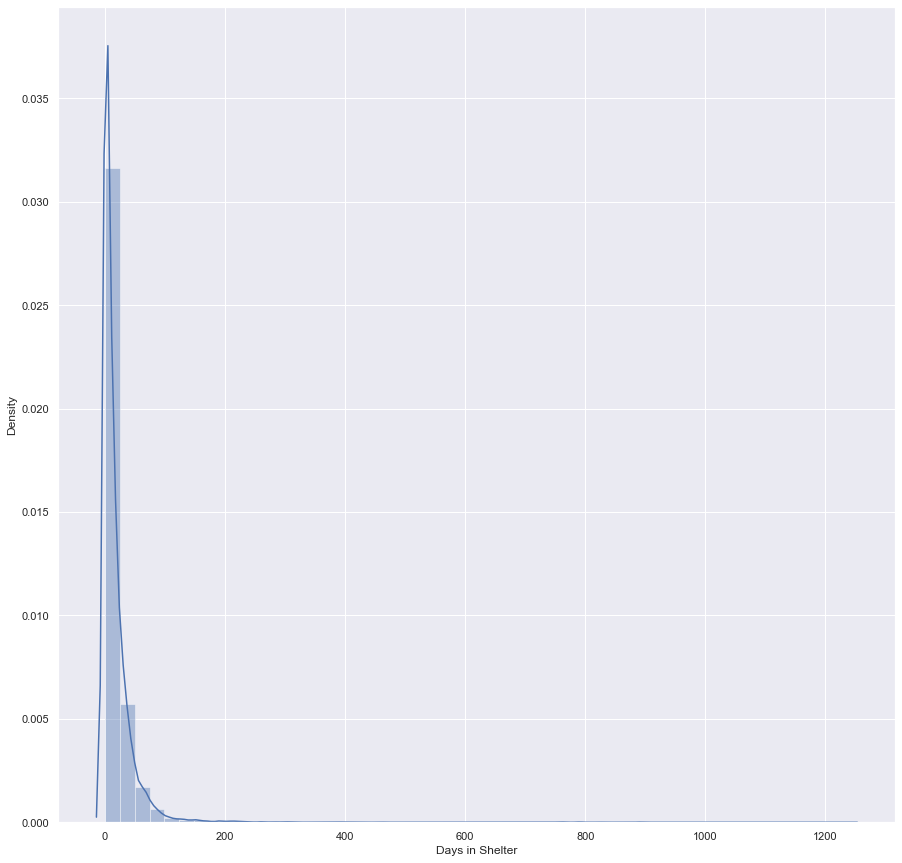

In [545]:
plt.figure(figsize=(15,15))
plt.tight_layout()
seabornInstance.distplot(dfClean['Days in Shelter'])

C:\Users\Rudy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

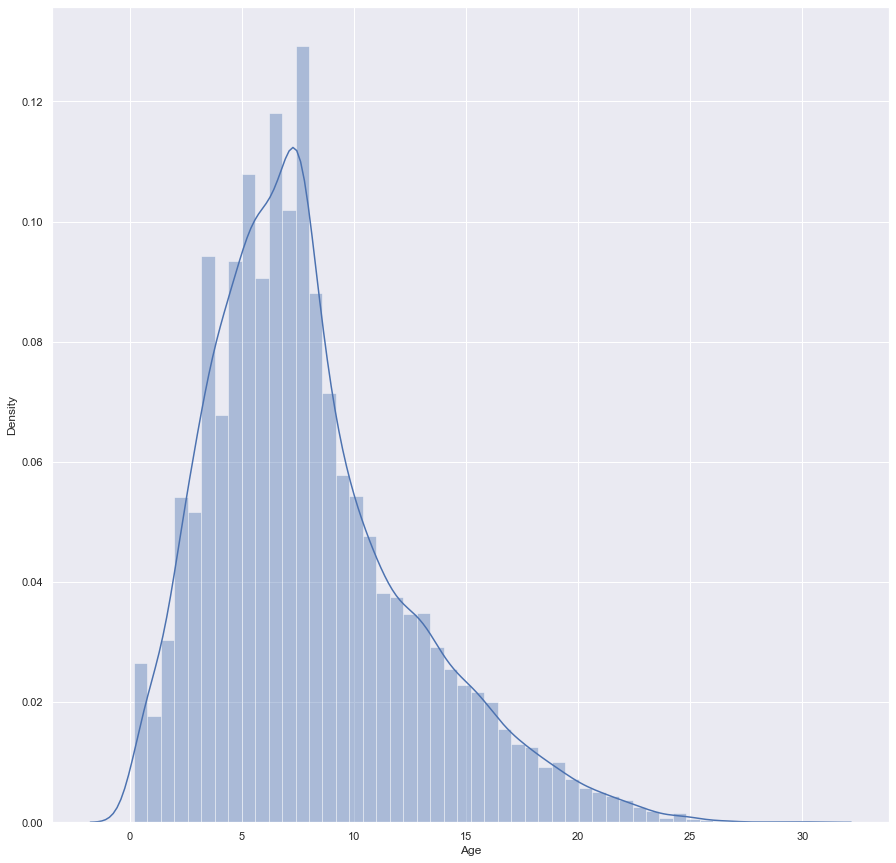

In [546]:
plt.figure(figsize=(15,15))
plt.tight_layout()
seabornInstance.distplot(dfClean['Age']) #LET ME SHOW YOU THE DATA THAT I AM WORKING WITH - This is how the distribution is

C:\Users\Rudy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

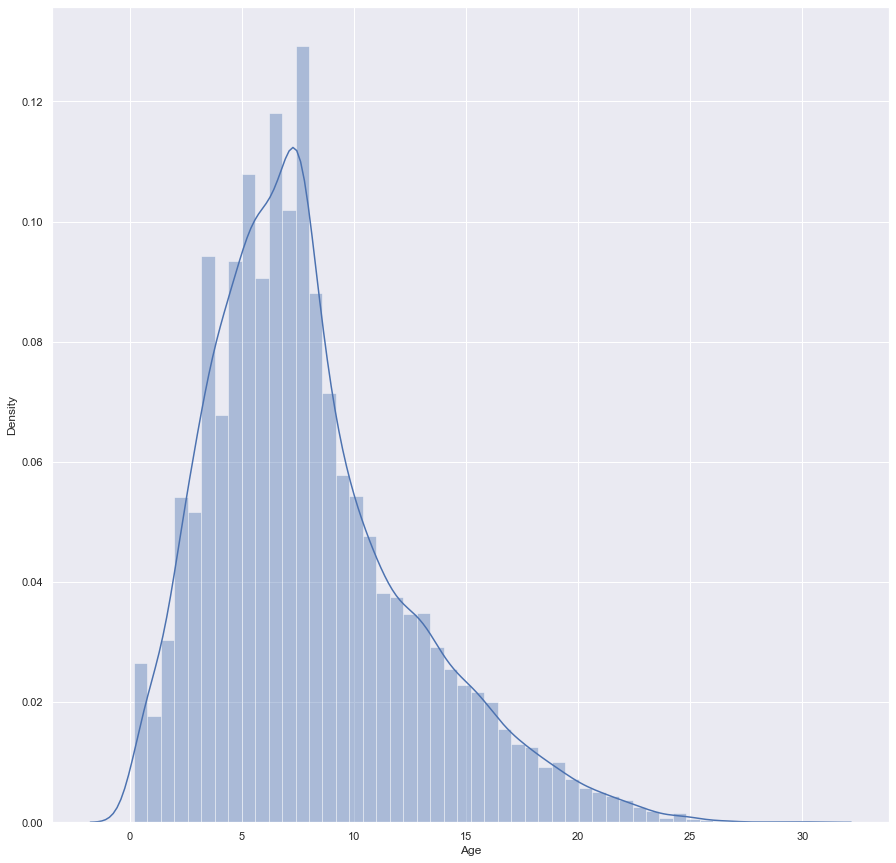

In [547]:
plt.figure(figsize=(15,15))
plt.tight_layout()
seabornInstance.distplot(dfClean['Age'])

In [548]:
df['Size'].value_counts()

12.0     7120
24.0     3789
59.0     3694
3.0      3533
5.0      1060
4.0       768
100.0     179
Name: Size, dtype: int64

In [549]:
df["Size"].replace({"SMALL": 12, "MED": 24, "LARGE": 59, "KITTN": 3, "TOY": 5, "PUPPY": 4, "X-LRG": 100}, inplace=True) #https://dogsized.com/what-are-the-different-sizes-of-dogs/


In [550]:
df["Age"].value_counts()

4.257534     30
8.515068     25
5.400000     20
3.687671     20
15.904110    20
             ..
1.106849      1
22.608219     1
12.723288     1
12.175342     1
13.756164     1
Name: Age, Length: 5124, dtype: int64

(-1.0, 4.0)

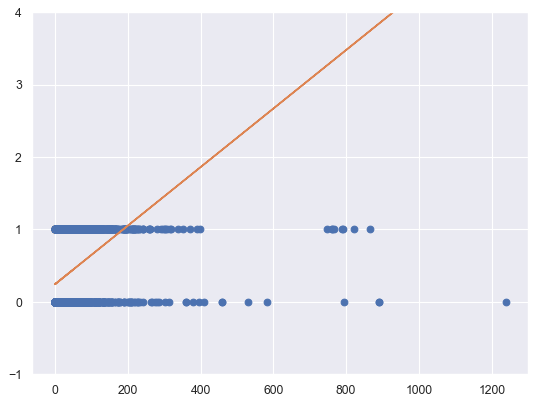

In [551]:
x = np.array(dfClean["Days in Shelter"])
y = np.array(dfClean["Outcome Type"])

figure(figsize=(8, 6), dpi=80)
plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
plt.ylim([-1, 4])

In [552]:
dfRenamed = dfClean.rename(columns={'Outcome Type': 'Adopted'})

In [553]:
dfRenamed #Changed column label to Adopted

,Age,Size,Days in Shelter,Adopted
0,7.624658,24.0,3,0
1,1.334247,12.0,49,1
2,2.306849,12.0,38,1
3,1.073973,3.0,6,1
4,3.854795,12.0,20,1
...,...,...,...,...
20171,NaN,12.0,0,0
20172,NaN,3.0,0,0
20173,4.805479,5.0,13,0
20174,6.589041,5.0,16,1


In [554]:
dfRenamed = dfRenamed.dropna()

In [555]:
dfRenamed

,Age,Size,Days in Shelter,Adopted
0,7.624658,24.0,3,0
1,1.334247,12.0,49,1
2,2.306849,12.0,38,1
3,1.073973,3.0,6,1
4,3.854795,12.0,20,1
...,...,...,...,...
20168,6.906849,24.0,29,0
20169,3.323288,3.0,42,1
20173,4.805479,5.0,13,0
20174,6.589041,5.0,16,1


In [556]:
reg = ols("Age ~ Size", dfRenamed).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     468.3
Date:                Tue, 23 Nov 2021   Prob (F-statistic):          2.25e-102
Time:                        11:58:41   Log-Likelihood:                -46427.
No. Observations:               15997   AIC:                         9.286e+04
Df Residuals:                   15995   BIC:                         9.287e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.2217      0.050    144.839      0.000       7.124       7.319
Size           0.0360      0.002     21.639      0.000       0.033       0.039
==============================================================================
Omnibus:                     2207.959   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3357.852
Skew:                           0.996   Prob(JB):                         0.00
Kurtosis:                       4.036   Cond. No.                         42.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [557]:
dfRenamed.dropna(subset = ["Age","Size","Days in Shelter"], inplace=True) #This will allow us to compare without considering NaN
reg2 = sm.OLS(dfRenamed["Adopted"], sm.add_constant(dfRenamed[["Size", "Age", "Days in Shelter"]])).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                Adopted   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     1190.
Date:                Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                        11:58:43   Log-Likelihood:                -9626.8
No. Observations:               15997   AIC:                         1.926e+04
Df Residuals:                   15993   BIC:                         1.929e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.6063      0.008     

<ipython-input-557-0fbd0cf86759>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfRenamed.dropna(subset = ["Age","Size","Days in Shelter"], inplace=True) #This will allow us to compare without considering NaN


In [559]:
X = dfRenamed[['Age', 'Size', "Days in Shelter"]]
y = dfRenamed['Adopted']

regr = linear_model.LinearRegression()
regr.fit(X, y)
print(regr.coef_)

[-0.01975793 -0.00577074  0.00349187]


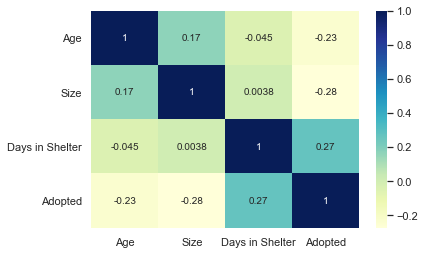

In [560]:
corr_df = dfRenamed.corr() #NOT OPTIMAL CORRELATION AS ITS ABSOLUTE VALUE IS NOT ABOVE .50

sns.heatmap(corr_df, cmap="YlGnBu", annot = True)
plt.show()

In [561]:
!pip install tensorflow

In [631]:
x.shape

(15997,)

In [632]:
x = dfRenamed['Age'].to_numpy()
y = dfRenamed["Adopted"].to_numpy()#CREATING ARRAY TO BE ABLE TO APPLY LOGISTIC REGRESSION
x.reshape(-1,1)

array([[7.62465753],
       [1.33424658],
       [2.30684932],
       ...,
       [4.80547945],
       [6.5890411 ],
       [6.53424658]])

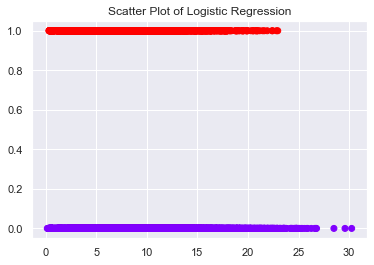

In [633]:
plt.scatter(x, y, c=y, cmap='rainbow')
plt.title('Scatter Plot of Logistic Regression')
plt.show()

In [634]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [635]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)#take 70% of data and trained model with taht data and left 70% to see if it matches with 30 left over. 

In [636]:
#log_reg = LogisticRegression() #model log_reg
#log_reg.fit(x_train, y_train)


In [637]:
from sklearn.linear_model import LogisticRegression
logmodel_adoption=LogisticRegression()

In [638]:
#Fit the model using the training dataset
logmodel_adoption.fit(x_train.reshape(-1,1), y_train)
#logmodel_adoption.fit(x_train, y_train)USE THIS ONE FOR MULTIPLE VARIABLE

LogisticRegression()

In [639]:
predictions = logmodel_adoption.predict(x_test.reshape(-1,1))
predictions


array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

In [640]:
#predictions = log_reg.predict(x_test.reshape(-1,1))#test is the data that was not used
#predictions

In [641]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [642]:
print("Classification Report \n ", classification_report(y_test, predictions))

Classification Report 
                precision    recall  f1-score   support

           0       0.63      0.85      0.72      2949
           1       0.47      0.22      0.30      1851

    accuracy                           0.60      4800
   macro avg       0.55      0.53      0.51      4800
weighted avg       0.57      0.60      0.56      4800



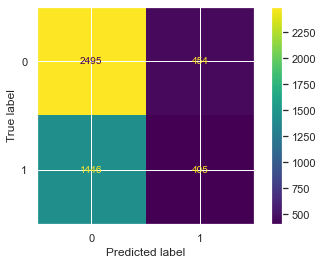

In [643]:
# Confusion Matrix: how accurate our outcomes are: Predicted "No" and Predicted "Yes"  on the top  Row and the column is Actual "No" and Actual "Yes"
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.svm import SVC

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logmodel_adoption.classes_)
disp.plot()

plt.show()

C:\Users\Rudy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Days in Shelter', ylabel='Density'>

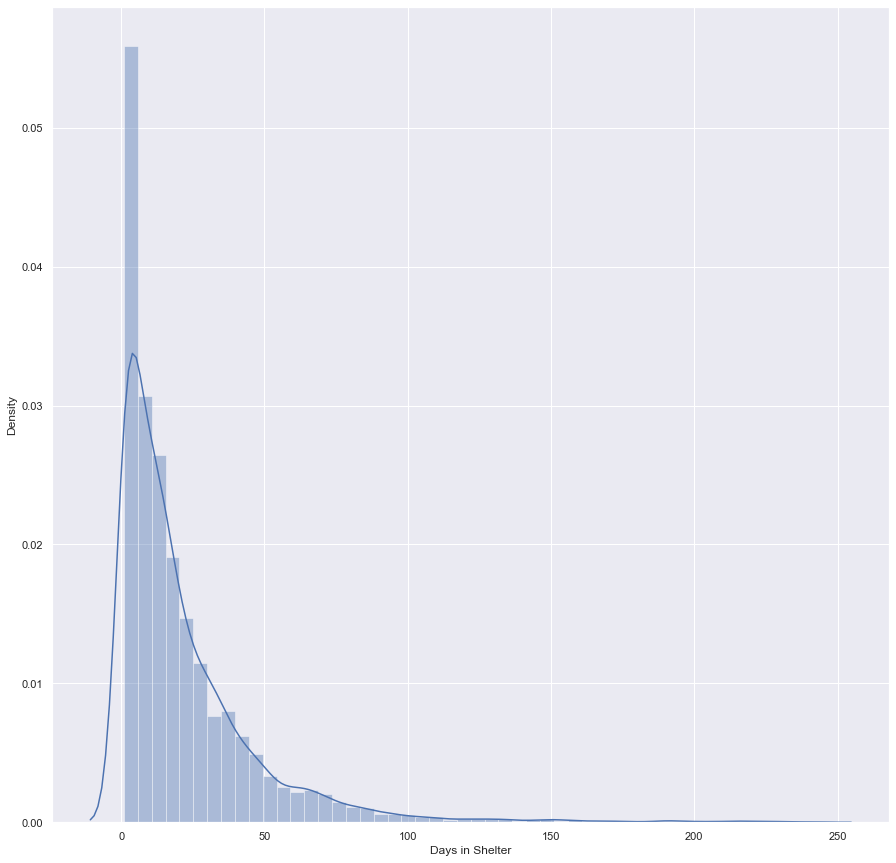

In [644]:
dfSeparated = dfRenamed.loc[(dfRenamed['Days in Shelter'] >= 1)
                     & (dfRenamed['Days in Shelter'] <= 250)]
plt.figure(figsize=(15,15))
plt.tight_layout()
seabornInstance.distplot(dfSeparated['Days in Shelter'])

In [645]:

from sklearn.metrics import recall_score

print("Recall:", round(recall_score(y_test, predictions), 2))


Recall: 0.22


In [646]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.6041666666666666

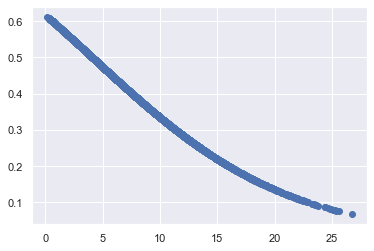

In [647]:
plt.scatter(x_test.reshape(-1,1), logmodel_adoption.predict_proba(x_test.reshape(-1,1))[:,1])
#plt.axhline(y=0.5, color='r', linestyle='-')
plt.show()

ValueError: x and y must be the same size

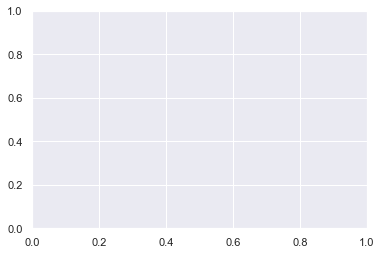

In [659]:
color_y = []
x_val = []
y_val =[]
for i, j in enumerate(y):
    if(j == 0):
        color_y+=['r']
    else:
        color_y+=['b']
    x_val+=[j[i], j[i]]
    y_val+=j
#color_adopt = ['b' if adopt[i] == 1] = [[0] for i in adopt]

plt.scatter(x, y, color=color_y)
plt.scatter(x_test.reshape(-1,1), logmodel_adoption.predict_proba(x_test.reshape(-1,1))[:,1])
plt.show()

In [660]:
probabilitiesArray = logmodel_adoption.predict_proba(x_train.reshape(-1,1)).shape
probabilitiesArray

(11197, 2)

In [666]:
x = np.array(dfRenamed["Age"])
y = np.array(dfRenamed["Adopted"])
x.reshape(-1,1)

array([[7.62465753],
       [1.33424658],
       [2.30684932],
       ...,
       [4.80547945],
       [6.5890411 ],
       [6.53424658]])

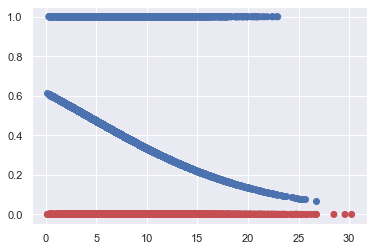

In [667]:
color_y = []
x_val = []
y_val =[]
for i, j in enumerate(y):
    if(j == 0):
        color_y+=['r']
    else:
        color_y+=['b']
    x_val+=[x[i], x[i]]
    adopt_val+=j
#color_adopt = ['b' if adopt[i] == 1] = [[0] for i in adopt]

plt.scatter(x, y, color=color_y)
plt.scatter(x_test.reshape(-1,1), logmodel_adoption.predict_proba(x_test.reshape(-1,1))[:,1])
plt.show()

In [ ]:
FROM HERE WE ARE TRYING TO USE MULTIVARIABLE

In [682]:
x3 = dfRenamed[['Age', 'Size', "Days in Shelter"]].to_numpy()
y3 = dfRenamed["Adopted"].to_numpy()#CREATING ARRAY TO BE ABLE TO APPLY LOGISTIC REGRESSION
x3.reshape(-1,1)

array([[ 7.62465753],
       [24.        ],
       [ 3.        ],
       ...,
       [ 6.53424658],
       [ 3.        ],
       [49.        ]])

In [683]:
from sklearn.model_selection import train_test_split
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.3, random_state=1)

In [684]:
from sklearn.linear_model import LogisticRegression
logmodel_adoption=LogisticRegression()

In [685]:
x3_train.shape

(11197, 3)

In [690]:
y3a = y3_train
y3a.shape

(11197,)

In [694]:
logmodel_adoption_multi1 = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg').fit(x3_train, y3a)

In [695]:
logmodel_adoption_multi1.fit(x3_train, y3a)

LogisticRegression(multi_class='multinomial', penalty='none', random_state=0,
                   solver='newton-cg')

In [697]:
print('Intercept: \n', logmodel_adoption_multi1.intercept_)
print('Coefficients: \n', logmodel_adoption_multi1.coef_)

Intercept: 
 [0.13237282]
Coefficients: 
 [[-0.04516815 -0.01761028  0.01820753]]


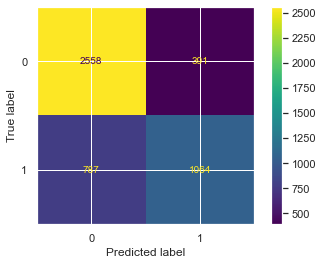

In [701]:
# Confusion Matrix: how accurate our outcomes are: Predicted "No" and Predicted "Yes"  on the top  Row and the column is Actual "No" and Actual "Yes"
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y3_test, logmodel_adoption_multi1.predict(x3_test))
cm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.svm import SVC

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logmodel_adoption_multi1.classes_)
disp.plot()

plt.show()

In [702]:
print("Recall:", round(recall_score(y3_test, logmodel_adoption_multi1.predict(x3_test)), 2))

Recall: 0.57


In [703]:
accuracy_score(y3_test, logmodel_adoption_multi1.predict(x3_test))

0.7545833333333334

In [705]:
df.columns

Index(['Unnamed: 0', 'Name', 'Named by Shelter', 'Type', 'Breed', 'Color',
       'Sex', 'Protected', 'Size', 'Date Of Birth', 'Impound Number',
       'Kennel Number', 'Animal ID', 'Intake Date', 'Outcome Date',
       'Days in Shelter', 'Intake Type', 'Intake Subtype', 'Outcome Type',
       'Outcome Subtype', 'Intake Condition', 'Outcome Condition',
       'Intake Jurisdiction', 'Outcome Jurisdiction', 'Outcome Zip Code',
       'Location', 'Count', 'Age', 'Before Covid'],
      dtype='object')

In [716]:
selected_columns = df[["Type","Size","Date Of Birth","Outcome Date","Days in Shelter", "Outcome Type"]]

In [717]:
dfUsed = selected_columns.copy()

In [718]:
dfUsed

,Type,Size,Date Of Birth,Outcome Date,Days in Shelter,Outcome Type
0,DOG,24.0,2014-04-11,2021-09-11,3,RETURN TO OWNER
1,DOG,12.0,2020-07-24,2021-09-11,49,ADOPTION
2,CAT,12.0,2019-08-04,2021-09-11,38,ADOPTION
3,CAT,3.0,2020-10-27,2021-02-05,6,ADOPTION
4,CAT,12.0,2018-01-16,2021-02-05,20,ADOPTION
...,...,...,...,...,...,...
20171,CAT,12.0,NaT,2019-03-21,0,EUTHANIZE
20172,CAT,3.0,NaT,2018-03-27,0,TRANSFER
20173,DOG,5.0,2017-02-03,2018-02-16,13,TRANSFER
20174,DOG,5.0,2015-04-24,2017-04-08,16,ADOPTION


In [715]:
dfClean

,Age,Size,Days in Shelter,Outcome Type
0,7.624658,24.0,3,0
1,1.334247,12.0,49,1
2,2.306849,12.0,38,1
3,1.073973,3.0,6,1
4,3.854795,12.0,20,1
...,...,...,...,...
20171,NaN,12.0,0,0
20172,NaN,3.0,0,0
20173,4.805479,5.0,13,0
20174,6.589041,5.0,16,1
